given camera angle of the task and the change of angle, create a weight distribution in shape of a cone and shift the weight distribution as camera/sub angle changes

In [49]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import copy

In [58]:
class particleFilter():
    particleMat = []
    def __init__(self, angleAmount):
        ''' 
        angleAmount is the number of angle we want in particleMat. 
        coordinate: say we use polar with 0 in Cartesian positve x direction. It goes [0,len(angleAmount)), 
        which we will output by mapping this to [0,360), or whatever the sub takes
        '''
        self.particles = angleAmount
        self.particleMat = [ 0 for i in range(self.particles) ]
        self.i_to_angle = 360/angleAmount
    
    def updateData():
        '''
        will clean up data. 
        '''
    
    def updateAngle(self,newAngle,stdev):
        '''
        data will be the input data in angles, most likely one single input and error in angle. 
        angle might need adjustment to fit our coordinates.
        error might need treatment to become standard deviation
        '''
        '''
        increase prob for "angle", bc we see angle.
        '''
        fWeight = 0.4
        
        for i in range(len(self.particleMat)):
            '''
            weight
            '''
            angle = int(round(i*self.i_to_angle))
            angleDiff = min([math.fabs(angle - newAngle),math.fabs(newAngle-angle+360)])
            gaussDelta =  math.e**( -angleDiff*angleDiff / (2* stdev**2) )
            self.particleMat[i] = fWeight*gaussDelta+ (1-fWeight)*self.particleMat[i]
        '''
        normalize
        '''
        total = 360/sum(self.particleMat)
        self.particleMat = [i*total for i in self.particleMat]
        
        '''
        update
        '''
    def updateCameraAngle(self,cameraChange):
        newAng = [0 for i in range(len(self.particleMat))]
        for i in range(len(self.particleMat)):
            angIdx = int(round(cameraChange/self.i_to_angle))
            if i-angIdx>=0:
                newAng[i-angIdx]=self.particleMat[i]
            else:
                newAng[i+int(round((360-cameraChange)/self.i_to_angle))]=self.particleMat[i]
        self.particleMat = newAng
        
    def getPredictedState(self):
        angles = [x*self.i_to_angle for x in range(0, self.particles)]
        max_x = angles[array(self.particleMat).argmax()] 
        return max_x
    

45.0


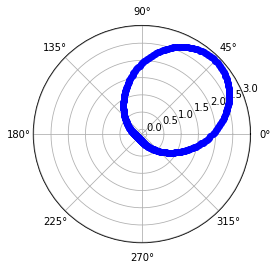

In [61]:
particle = particleFilter(360)
a=particle.updateAngle(90,50)
for i in range(200):
    a=particle.updateAngle(45,50)
for i in range(359):
    plt.polar(i/180*math.pi, particle.particleMat[i],"bo")
    
print(particle.getPredictedState())